In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot


df = pd.read_csv("edi_transacciones_2025_completo_final_actualizado_v2.csv")



<h3>Descripción del dataset</h3>
<h5>Este comando nos muestra la cantidad de columnas y renglones nulos en el archivo</h5>

    

In [119]:
df.count()


Estatus                         18000
Transacción                     18000
Fecha de Transmisión            18000
Proveedor                       18000
Tamaño del Archivo (KB)         17100
Número de Documentos            17100
Estándar                        18000
Versión del Cliente             17100
Tipo de Error                   17100
Tiempo de Procesamiento (ms)    18000
Canal de Transmisión            18000
Sistema Receptor                18000
Prioridad del Mensaje           18000
Causa de la Falla               18000
Detectado                       18000
Reportado por Cliente Final     18000
Sistema Transmisor              18000
dtype: int64

<h3>Revisión de dataset</h3>
<h5>Para ver una muestra de los datos, aplicamos este comando y podemos ver la naturaleza de los mismos, sus columnas y sus tipos. Ejecutamos el comando head.</h5>


In [120]:
df.head()

,Estatus,Transacción,Fecha de Transmisión,Proveedor,Tamaño del Archivo (KB),Número de Documentos,Estándar,Versión del Cliente,Tipo de Error,Tiempo de Procesamiento (ms),Canal de Transmisión,Sistema Receptor,Prioridad del Mensaje,Causa de la Falla,Detectado,Reportado por Cliente Final,Sistema Transmisor
0,Falla,856,2025-11-24,10749,442.74,34.0,EDIFACT,ECC6.0,Sin respuesta,1210.57,AS2,SAP,Media,Documento parcialmente transmitido,Sí,Sí,EPICOR
1,Éxito,810,2025-02-27,5172,585.29,32.0,X12,S4HANA,Error de autenticación,1359.60,API,Legacy,Alta,Falta un campo mandatorio,No,Sí,SEEBURGER
2,Falla,862,2025-01-13,10111,451.80,44.0,EDIFACT,R/3,Timeout,1114.57,API,WEBEDI,Baja,Mal encoding,No,Sí,LEGACY
3,Falla,856,2025-05-21,8871,444.04,23.0,EDIFACT,410,Error de autenticación,1697.54,SFTP,VAN,Alta,Documento parcialmente transmitido,No,Sí,VAN
4,Falla,830,2025-05-06,20483,NaN,10.0,EDIFACT,S4HANA,Formato inválido,1415.00,API,Legacy,Baja,Fallo en unidades de medida,Sí,Sí,LEGACY


<h5>Si revisamos el archivo de manera general podemos localizar 18000 registros con 17 columnas con el comando shape.</h5>

In [121]:
df.shape

(18000, 17)

<h3>Revisión de características (columnas)</h3>
<h5>Este comando nos da la definición de las variables (características) de los datos en el archivo csv</h5>

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Estatus                       18000 non-null  object 
 1   Transacción                   18000 non-null  int64  
 2   Fecha de Transmisión          18000 non-null  object 
 3   Proveedor                     18000 non-null  int64  
 4   Tamaño del Archivo (KB)       17100 non-null  float64
 5   Número de Documentos          17100 non-null  float64
 6   Estándar                      18000 non-null  object 
 7   Versión del Cliente           17100 non-null  object 
 8   Tipo de Error                 17100 non-null  object 
 9   Tiempo de Procesamiento (ms)  18000 non-null  float64
 10  Canal de Transmisión          18000 non-null  object 
 11  Sistema Receptor              18000 non-null  object 
 12  Prioridad del Mensaje         18000 non-null  object 
 13  C

<h5>Podemos ver que algunas propiedades o atributos del dataset estan en nulo. Tamaño del archivo, numero de documentos, version del cliente, tipo de error.</h5>

In [123]:
df.isnull().sum()

Estatus                           0
Transacción                       0
Fecha de Transmisión              0
Proveedor                         0
Tamaño del Archivo (KB)         900
Número de Documentos            900
Estándar                          0
Versión del Cliente             900
Tipo de Error                   900
Tiempo de Procesamiento (ms)      0
Canal de Transmisión              0
Sistema Receptor                  0
Prioridad del Mensaje             0
Causa de la Falla                 0
Detectado                         0
Reportado por Cliente Final       0
Sistema Transmisor                0
dtype: int64

<h5>Esto nos da un informe de las columnas, sus tipos de datos, sus valores faltantes, minimos y maximos</h5>

In [124]:

# Crear tabla resumen
summary = pd.DataFrame({
    "Nombre de Columna": df.columns,
    "Tipo de Dato": df.dtypes.values,
    "Valores Faltantes": df.isnull().sum().values,
    "Valor Mínimo": [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],
    "Valor Máximo": [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns]
})

# Mostrar la tabla
summary


,Nombre de Columna,Tipo de Dato,Valores Faltantes,Valor Mínimo,Valor Máximo
0,Estatus,object,0,NaN,NaN
1,Transacción,int64,0,810.00,862.00
2,Fecha de Transmisión,object,0,NaN,NaN
3,Proveedor,int64,0,1501.00,33568.00
4,Tamaño del Archivo (KB),float64,900,81.39,929.89
5,Número de Documentos,float64,900,1.00,49.00
6,Estándar,object,0,NaN,NaN
7,Versión del Cliente,object,900,NaN,NaN
8,Tipo de Error,object,900,NaN,NaN
9,Tiempo de Procesamiento (ms),float64,0,8.76,2369.99


<h3>Limpieza de Datos</h3>
Este código nos permite hacer una limpieza de los datos (nulos, duplicados, formato de fecha y numero)

In [125]:
# 1. Eliminar filas duplicadas
dflimpio = df.drop_duplicates()

# 2. Eliminar filas con valores nulos (opción básica)
dflimpio = dflimpio.dropna()

# 3. Corregir formatos de columnas (ejemplo: convertir fecha a datetime) - PRIMERA TRANSFORMACIÓN
dflimpio['Fecha de Transmisión'] = pd.to_datetime(dflimpio['Fecha de Transmisión'], errors='coerce')

# 4. Validar tipos de datos (ejemplo: convertir a entero) - SEGUNDA TRANSFORMACIÓN
dflimpio['Número de Documentos'] = dflimpio['Número de Documentos'].astype('Int64')



<h4>Después de eliminar duplicados y limpiar los datos</h4>

In [126]:
# 5. Verificar cambios
print("Registros después de limpieza:", len(df))
dflimpio.info()

Registros después de limpieza: 18000
<class 'pandas.core.frame.DataFrame'>
Index: 14665 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Estatus                       14665 non-null  object        
 1   Transacción                   14665 non-null  int64         
 2   Fecha de Transmisión          14665 non-null  datetime64[ns]
 3   Proveedor                     14665 non-null  int64         
 4   Tamaño del Archivo (KB)       14665 non-null  float64       
 5   Número de Documentos          14665 non-null  Int64         
 6   Estándar                      14665 non-null  object        
 7   Versión del Cliente           14665 non-null  object        
 8   Tipo de Error                 14665 non-null  object        
 9   Tiempo de Procesamiento (ms)  14665 non-null  float64       
 10  Canal de Transmisión          14665 non-null  object        
 

<h3>Transformación de variables</h3>

<h5>Instalamos el scikit-learn para poder hacer algunas transformaciones de variables</h5>

In [127]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
from sklearn.preprocessing import LabelEncoder

#Primero transformamos a enteros los numeros de documentos - TERCERA TRANSFORMACIÓN
dflimpio['Número de Documentos'] = dflimpio['Número de Documentos'].astype('Int64')

#Ahora agregamos una nueva columna para incorporar el tipo de error (ya que es categorico) y la llamamos Tipo de Error_Nu - CUARTA TRANSFORMACIÓN
le = LabelEncoder()
dflimpio['Tipo de Error_Num'] = le.fit_transform(dflimpio['Tipo de Error'])

#Quinta transformación
dflimpio['Estatus'] = dflimpio['Estatus'].replace({'Falla': 1, 'Éxito': 0})


dflimpio.head()



C:\Users\jc70794\AppData\Local\Temp\ipykernel_28520\1897399793.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dflimpio['Estatus'] = dflimpio['Estatus'].replace({'Falla': 1, 'Éxito': 0})


,Estatus,Transacción,Fecha de Transmisión,Proveedor,Tamaño del Archivo (KB),Número de Documentos,Estándar,Versión del Cliente,Tipo de Error,Tiempo de Procesamiento (ms),Canal de Transmisión,Sistema Receptor,Prioridad del Mensaje,Causa de la Falla,Detectado,Reportado por Cliente Final,Sistema Transmisor,Tipo de Error_Num
0,1,856,2025-11-24,10749,442.74,34,EDIFACT,ECC6.0,Sin respuesta,1210.57,AS2,SAP,Media,Documento parcialmente transmitido,Sí,Sí,EPICOR,3
1,0,810,2025-02-27,5172,585.29,32,X12,S4HANA,Error de autenticación,1359.60,API,Legacy,Alta,Falta un campo mandatorio,No,Sí,SEEBURGER,1
2,1,862,2025-01-13,10111,451.80,44,EDIFACT,R/3,Timeout,1114.57,API,WEBEDI,Baja,Mal encoding,No,Sí,LEGACY,4
3,1,856,2025-05-21,8871,444.04,23,EDIFACT,410,Error de autenticación,1697.54,SFTP,VAN,Alta,Documento parcialmente transmitido,No,Sí,VAN,1
5,0,830,2025-04-25,26702,376.54,8,EDIFACT,R/3,Timeout,947.77,AS2,SAP,Alta,Formato no soportado,No,Sí,SEEBURGER,4


<h3>Análisis de variables para determinar distribuciones</h3>

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

# --- 1. Seleccionar columnas numéricas omitimos Proveedor, Transacción y la del tipo de error porque aunque es numerica no es continua
num_cols = [col for col in dflimpio.select_dtypes(include=['int64', 'float64']).columns 
            if col not in ['Estatus','Proveedor', 'Transacción','Tipo de Error_Num']]

# --- 2. Crear un DataFrame para el resumen ---
resumen_normalidad = pd.DataFrame(columns=['Variable', 'Estadístico', 'p-valor', 'Distribución'])


<H3>Análisis KDE</H3>

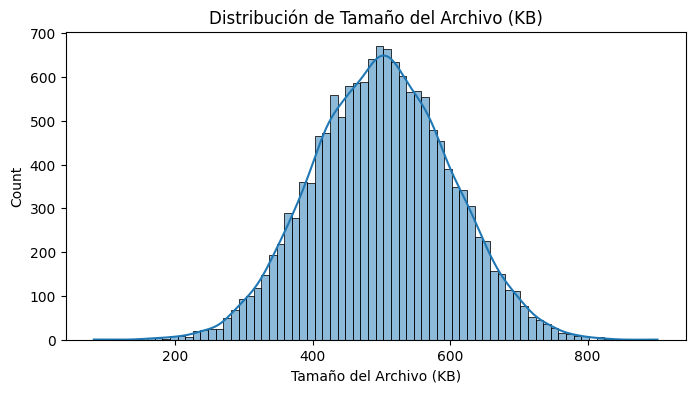

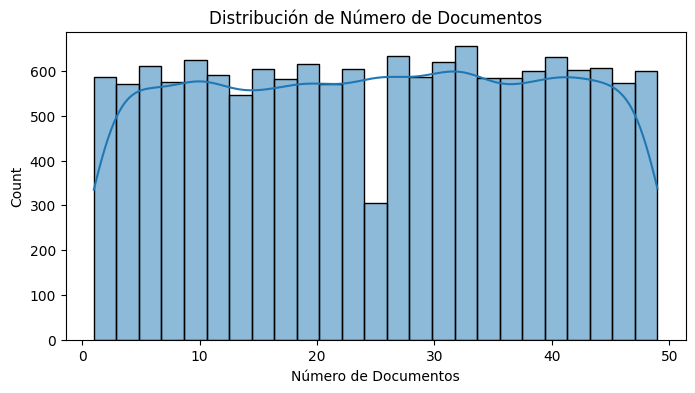

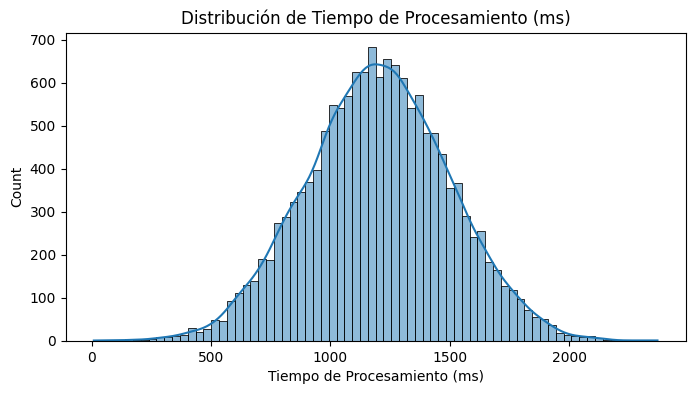

In [130]:
#Obtener el KDE
for col in num_cols:
    datos = dflimpio[col].dropna()
    
    # --- Histograma con KDE ---
    plt.figure(figsize=(8, 4))
    sns.histplot(datos, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

<H4>Podemos observar que los datos de tiempo de procesamiento y tamaño del archivo siguen distribuciones normales</H4>

<h3>Análisis Q-Q Plot</h3>

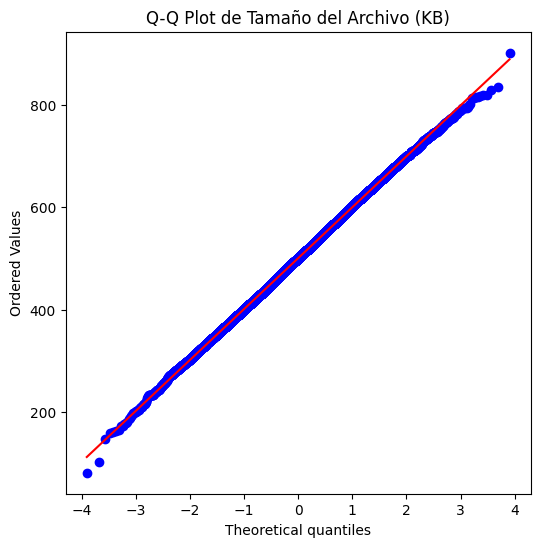

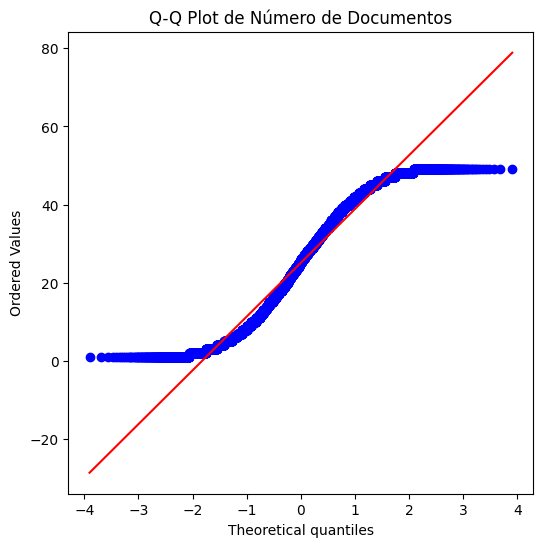

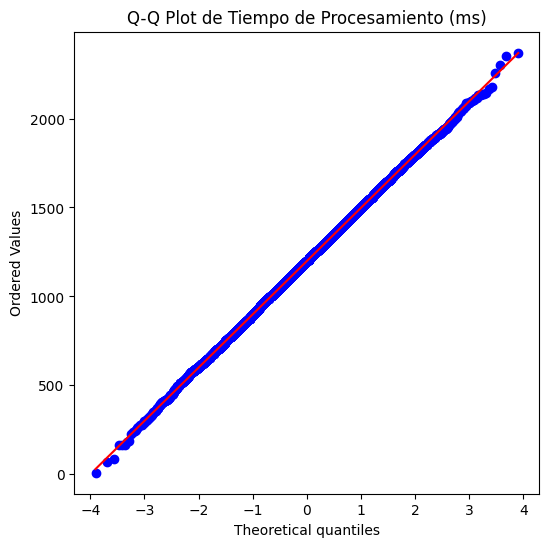

In [131]:
for col in num_cols:
    datos = dflimpio[col].dropna()
    
    # --- Q-Q Plot ---
    plt.figure(figsize=(6, 6))
    probplot(datos, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')
    plt.show()    


<h4>Observando las gráficas podemos concluir que el tamaño del archivo y el tiempo de procesamiento siguen distribuciones normales, solo la del numero de documentos no</h4>

In [132]:
import pandas as pd
from scipy.stats import normaltest


# Seleccionar columnas numéricas
num_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)']

# Lista para almacenar resultados
resultados = []

# Aplicar prueba de normalidad de D'Agostino y Pearson
for col in num_cols:
    datos = dflimpio[col].dropna()
    stat, p = normaltest(datos)
    distribucion = "Normal" if p > 0.05 else "No Normal"
    
    resultados.append({
        'Variable': col,
        'Estadístico': round(stat, 4),
        'p-valor': round(p, 4),
        'Distribución': distribucion
    })

# Convertir a DataFrame
resumen_normalidad = pd.DataFrame(resultados)

# Mostrar resultados
print("Resumen de pruebas de normalidad (D'Agostino y Pearson):")
display(resumen_normalidad)




Resumen de pruebas de normalidad (D'Agostino y Pearson):


,Variable,Estadístico,p-valor,Distribución
0,Tamaño del Archivo (KB),4.9560,0.0839,Normal
1,Número de Documentos,12058.5819,0.0000,No Normal
2,Tiempo de Procesamiento (ms),1.1394,0.5657,Normal


<h3>Normalización y estandarización de conjunto de datos</h3>

In [133]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar columnas numéricas relevantes
columnas = ['Número de Documentos', 'Tamaño del Archivo (KB)', 'Tiempo de Procesamiento (ms)']

# Separar datos por estatus
df_falla = dflimpio[dflimpio['Estatus'] == 0][columnas].dropna()
df_exito = dflimpio[dflimpio['Estatus'] == 1][columnas].dropna()

# Normalización (Min-Max)
minmax_scaler = MinMaxScaler()
normalizado_falla = minmax_scaler.fit_transform(df_falla)
normalizado_exito = minmax_scaler.fit_transform(df_exito)

df_normalizado_falla = pd.DataFrame(normalizado_falla, columns=[f"{col}_N" for col in columnas])
df_normalizado_exito = pd.DataFrame(normalizado_exito, columns=[f"{col}_N" for col in columnas])

# Estandarización (Z-score)
standard_scaler = StandardScaler()
estandarizado_falla = standard_scaler.fit_transform(df_falla)
estandarizado_exito = standard_scaler.fit_transform(df_exito)

df_estandarizado_falla = pd.DataFrame(estandarizado_falla, columns=[f"{col}_E" for col in columnas])
df_estandarizado_exito = pd.DataFrame(estandarizado_exito, columns=[f"{col}_E" for col in columnas])

# Combinar resultados
df_resultado_falla = pd.concat([df_falla.reset_index(drop=True), df_normalizado_falla, df_estandarizado_falla], axis=1)
df_resultado_exito = pd.concat([df_exito.reset_index(drop=True), df_normalizado_exito, df_estandarizado_exito], axis=1)

# Mostrar resultados
print("Transformaciones para transacciones con Falla:")
display(df_resultado_falla.head())

print("\nTransformaciones para transacciones con Éxito:")
display(df_resultado_exito.head())




Transformaciones para transacciones con Falla:


,Número de Documentos,Tamaño del Archivo (KB),Tiempo de Procesamiento (ms),Número de Documentos_N,Tamaño del Archivo (KB)_N,Tiempo de Procesamiento (ms)_N,Número de Documentos_E,Tamaño del Archivo (KB)_E,Tiempo de Procesamiento (ms)_E
0,32,585.29,1359.60,0.645833,0.683606,0.565333,0.500019,0.861514,0.542198
1,8,376.54,947.77,0.145833,0.400410,0.384888,-1.201964,-1.251739,-0.841356
2,38,524.87,729.43,0.770833,0.601639,0.289221,0.925515,0.249860,-1.574875
3,26,618.75,1535.82,0.520833,0.728999,0.642545,0.074523,1.200241,1.134214
4,19,472.55,1093.67,0.375000,0.530660,0.448815,-0.421889,-0.279795,-0.351201



Transformaciones para transacciones con Éxito:


,Número de Documentos,Tamaño del Archivo (KB),Tiempo de Procesamiento (ms),Número de Documentos_N,Tamaño del Archivo (KB)_N,Tiempo de Procesamiento (ms)_N,Número de Documentos_E,Tamaño del Archivo (KB)_E,Tiempo de Procesamiento (ms)_E
0,34,442.74,1210.57,0.687500,0.425275,0.508976,0.619033,-0.577412,0.035859
1,44,451.80,1114.57,0.895833,0.436624,0.468319,1.330075,-0.486882,-0.282838
2,23,444.04,1697.54,0.458333,0.426904,0.715212,-0.163112,-0.564422,1.652483
3,21,578.17,1526.37,0.416667,0.594917,0.642720,-0.305320,0.775840,1.084240
4,12,565.82,1177.91,0.229167,0.579447,0.495144,-0.945258,0.652435,-0.072565


<h4>Se dividieron los datos en dos subconjuntos:
df_falla: transacciones con Estatus == 0 (fallidas) y df_exito: transacciones con Estatus == 1 (exitosas)

Se aplicó primero una normalización (Min-Max Scaling), la cual escala los valores entre 0 y 1. Se aplicó por separado a fallas y éxitos para evitar que los valores de un grupo influyan en el otro.


Luego se hizo una estandarización (Z-score) la cual transforma los datos para que tengan media 0 y desviación estándar 1 (distribución normales)
También se aplicó por separado a cada grupo y finalmente se combinaron los resultados

Se creó un DataFrame para cada grupo que incluye:
Las columnas originales.
Las columnas normalizadas (_Normalizado).
Las columnas estandarizadas (_Estandarizado).
</h4>



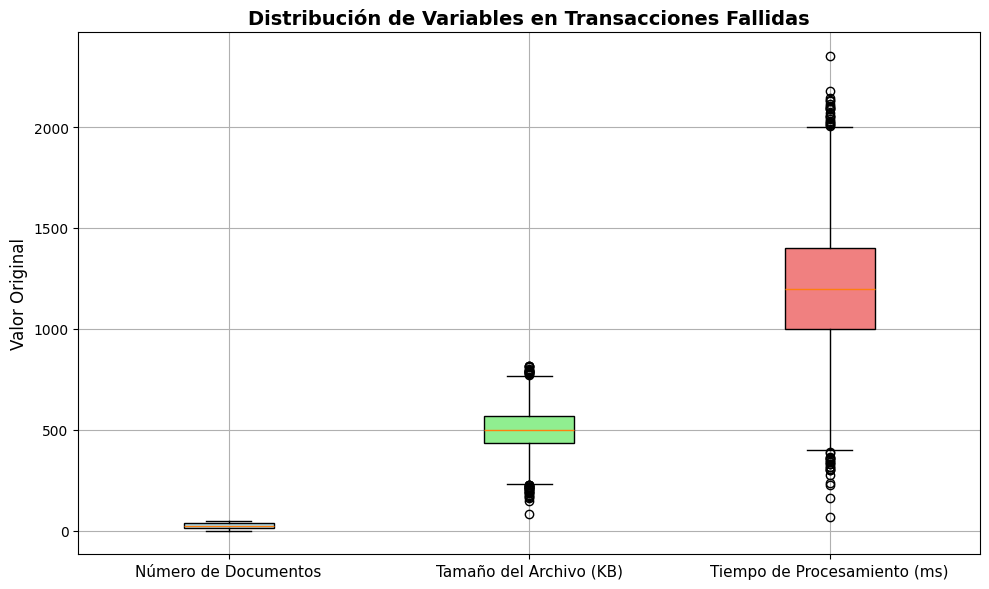

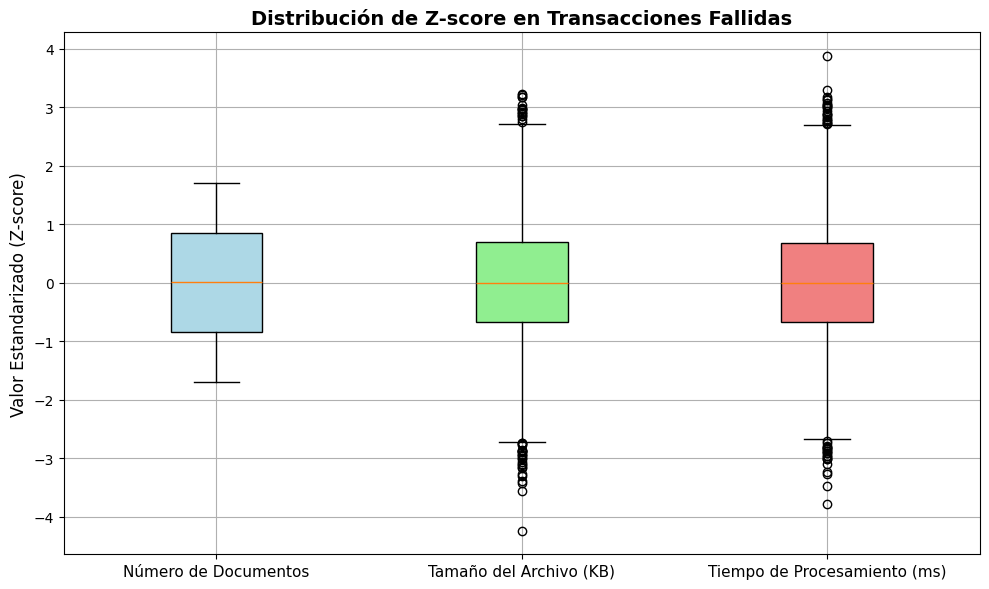

In [134]:
import pandas as pd
import matplotlib.pyplot as plt



#Grficar el boxplot antes de Normalizado y Estandarizado
# Columnas a graficar
columnas = df_falla.columns.tolist()

# Crear boxplot con colores personalizados
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot([df_falla[col] for col in columnas], patch_artist=True)

# Aplicar colores a cada boxplot
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar el gráfico
ax.set_title('Distribución de Variables en Transacciones Fallidas', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor Original', fontsize=12)
ax.set_xticks(range(1, len(columnas) + 1))
ax.set_xticklabels(columnas, rotation=0, fontsize=11)
ax.grid(True)
plt.tight_layout()
plt.show()





# Seleccionar solo las columnas estandarizadas del DataFrame de fallas
columnas_zscore = [
    'Número de Documentos_E',
    'Tamaño del Archivo (KB)_E',
    'Tiempo de Procesamiento (ms)_E'
]

# Crear boxplot con colores personalizados
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot([df_resultado_falla[col] for col in columnas_zscore], patch_artist=True)

# Aplicar colores a cada boxplot
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar el gráfico
ax.set_title('Distribución de Z-score en Transacciones Fallidas', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor Estandarizado (Z-score)', fontsize=12)
ax.set_xticks(range(1, len(columnas_zscore) + 1))
ax.set_xticklabels([col.replace('_E', '') for col in columnas_zscore], rotation=0, fontsize=11)
ax.grid(True)
plt.tight_layout()
plt.show()





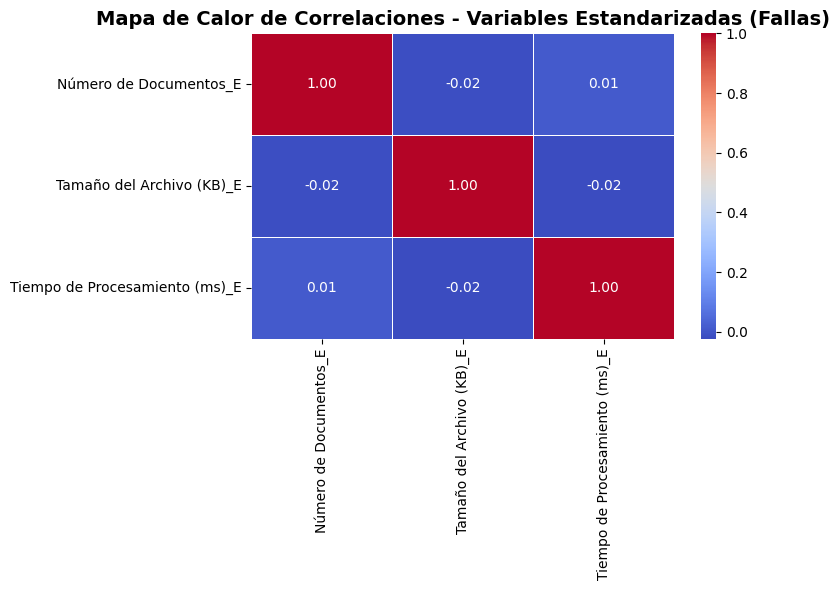

Matriz de correlación entre variables estandarizadas (transacciones fallidas):
                                Número de Documentos_E  \
Número de Documentos_E                        1.000000   
Tamaño del Archivo (KB)_E                    -0.016207   
Tiempo de Procesamiento (ms)_E                0.009478   

                                Tamaño del Archivo (KB)_E  \
Número de Documentos_E                          -0.016207   
Tamaño del Archivo (KB)_E                        1.000000   
Tiempo de Procesamiento (ms)_E                  -0.022634   

                                Tiempo de Procesamiento (ms)_E  
Número de Documentos_E                                0.009478  
Tamaño del Archivo (KB)_E                            -0.022634  
Tiempo de Procesamiento (ms)_E                        1.000000  


In [140]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas estandarizadas
columnas_estandarizadas = [col for col in df_resultado_falla.columns if col.endswith('_E')]
df_estandarizado = df_resultado_falla[columnas_estandarizadas]

# Calcular la matriz de correlación
correlation_matrix = df_estandarizado.corr()

# Visualizar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones - Variables Estandarizadas (Fallas)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Matriz de correlación entre variables estandarizadas (transacciones fallidas):")
print(correlation_matrix)





